In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%config Completer.use_jedi = False


/kaggle/input/housing-dataset/Housing.csv


In [6]:
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")
House_Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
#Checking the length of the data frame
House_Data_length = House_Data.sample(n=len(House_Data), random_state=1)
House_Data_length


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,7070000,6240,4,2,2,yes,no,no,no,yes,1,no,furnished
247,4550000,8400,4,1,4,yes,no,no,no,no,3,no,unfurnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
107,6125000,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
483,2940000,6615,3,1,2,yes,no,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
144,5600000,4700,4,1,2,yes,yes,yes,no,yes,1,no,furnished
72,6720000,5020,3,1,4,yes,no,no,no,yes,0,yes,unfurnished
235,4620000,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished


In [8]:
House_Data.shape

(545, 13)

* **This indicates the House dataset has 545 rows and 13 columns.**

In [9]:
#checking mainroad proximity
House_Data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [10]:
Convert_non_numeric = pd.get_dummies(House_Data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]).astype(int)
Convert_non_numeric

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0,1,1,0,1,0,1,0,0,1,0,1
1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,1,0,0,1,1,0,1,0,0,1
3,0,1,1,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,1,1,0,0,1,1,0,1,0,1,0
541,1,0,1,0,1,0,1,0,1,0,1,0
542,0,1,1,0,1,0,1,0,1,0,1,0
543,1,0,1,0,1,0,1,0,1,0,1,0


In [11]:
House_Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
# Drop non numeric variables
House_Data_drop = House_Data.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis = 1)
House_Data_drop

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [14]:
House_Data_Ready = pd.concat([House_Data_drop,Convert_non_numeric], axis=1)
House_Data_Ready.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [15]:
# check if there are null values after cleaning data
House_Data_Ready = House_Data_Ready.dropna()
len(House_Data_Ready)

545

In [16]:
train_pd, test_pd, val_pd = House_Data_Ready[:330],House_Data_Ready[330:450],House_Data_Ready[450:]
len(train_pd),len(test_pd),len(val_pd)

(330, 120, 95)

In [17]:
#create  a matrix
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_train

array([[13300000,     7420,        4, ...,        0,        1,        0],
       [12250000,     8960,        4, ...,        0,        1,        1],
       [12250000,     9960,        3, ...,        1,        0,        0],
       ...,
       [ 3990000,     6480,        3, ...,        0,        1,        1],
       [ 3990000,     4500,        3, ...,        0,        1,        1],
       [ 3990000,     3960,        3, ...,        1,        0,        1]])

In [18]:
x_train.shape

(330, 17)

In [19]:
y_train.shape

(330,)

In [20]:
# setup the test model
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1],val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1],test_pd.to_numpy()[:, -1]
x_train.shape, y_train.shape, x_val.shape, y_val.shape,x_test.shape, y_test.shape 

((330, 17), (330,), (95, 17), (95,), (120, 17), (120,))

In [21]:
# Assuming you have loaded train_pd, val_pd, test_pd from your data
# Splitting the data as per the provided code
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

# Check the shapes
print("Training data shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("\nValidation data shapes:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("\nTesting data shapes:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Training data shapes:
x_train shape: (330, 17)
y_train shape: (330,)

Validation data shapes:
x_val shape: (95, 17)
y_val shape: (95,)

Testing data shapes:
x_test shape: (120, 17)
y_test shape: (120,)


In [26]:

from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming x_train has 18 features
x_train = np.random.rand(100, 18)  # Random data for example

# Fit the scaler on the first 13 features
scaler = StandardScaler().fit(x_train[:, :13])

def preprocessor(X, scaler):
    A = np.copy(X)
    A[:, :13] = scaler.transform(A[:, :13])
    return A

# Using the preprocessor function
x_train_preprocessor = preprocessor(x_train, scaler)

# Checking the shape of the preprocessed data
print(x_train_preprocessor.shape)


(100, 18)


In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x_train = np.random.rand(100, 18)

scaler = StandardScaler().fit(x_train[:, :13])

def preprocessor(X):
    A = np.copy(X)
    A[:, :13] = scaler.transform(A[:, :13])
    return A

x_train_prepropcessor = preprocessor(x_train)
x_train_preprocessor  

array([[ 1.53869408e+00,  7.59356139e-02, -1.59666117e+00, ...,
         8.62798344e-01,  9.35069956e-01,  5.38854259e-01],
       [-1.83823684e+00,  4.08907782e-01, -8.93125220e-01, ...,
         8.23720387e-01,  1.44331354e-03,  9.54167295e-01],
       [ 7.48462396e-01, -1.77260011e+00, -6.82673207e-02, ...,
         3.57876984e-01,  7.68870513e-01,  3.08152723e-01],
       ...,
       [ 3.06128833e-01,  4.80552804e-02, -3.69336071e-02, ...,
         6.23863314e-01,  1.16034194e-01,  4.35280738e-01],
       [ 4.88264941e-01,  7.11544156e-01,  6.67632258e-01, ...,
         2.50709881e-01,  4.52053461e-01,  9.16664946e-01],
       [ 1.13670961e+00, -5.26761655e-01,  9.38024439e-01, ...,
         1.01414767e-01,  5.44695884e-01,  9.11816424e-01]])

In [28]:
pd.DataFrame(x_train_preprocessor).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.538694,0.075936,-1.596661,0.437729,-0.505796,0.653577,-0.520081,-0.195234,1.256353,-0.752062,-0.941162,-0.131890,1.303294,0.879351,0.637128,0.862798,0.935070,0.538854
1,-1.838237,0.408908,-0.893125,1.382167,-0.184536,-0.858882,1.226340,1.349391,-0.394453,1.317901,-1.678856,-0.231671,0.794250,0.575254,0.614893,0.823720,0.001443,0.954167
2,0.748462,-1.772600,-0.068267,0.686354,0.150244,1.860807,-1.709979,0.028134,0.072196,-0.005933,1.587791,-0.004635,-0.130253,0.122695,0.880835,0.357877,0.768871,0.308153
3,-0.697902,0.454844,-1.463562,0.822390,-0.841947,-0.182292,-1.501053,-0.928103,0.806230,-1.169283,-0.752759,-0.197482,1.243914,0.445417,0.674295,0.826983,0.361668,0.482408
4,0.639100,0.452392,0.608728,-1.044211,1.541566,0.635650,0.683366,-1.509913,-1.534403,0.734534,1.474454,-1.104371,-0.345045,0.466322,0.982810,0.906375,0.507116,0.299233


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: >, <Axes: >]], dtype=object)

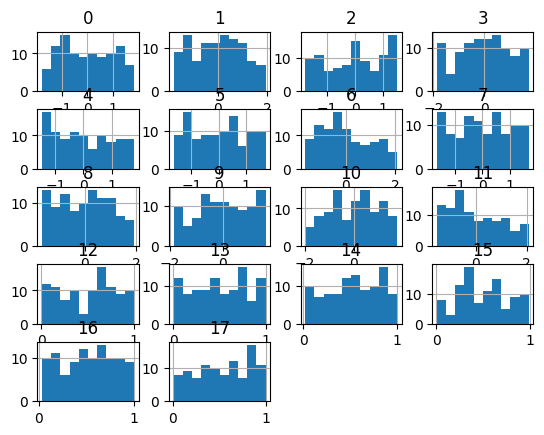

In [24]:

pd.DataFrame(x_train_preprocessor).hist()

array([[<Axes: title={'center': '1'}>]], dtype=object)

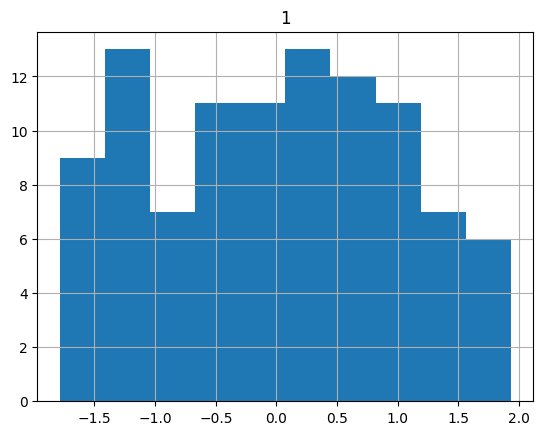

In [25]:
pd.DataFrame(x_train_preprocessor).hist(1) # the first histogram, this can be used for all the 17 Histograms.

In [2]:
'''# making models 
#sum(y_pred(x) - y)^2/n mean sqquared

from sklearn.metrics import mean_squared_error as mse #import a mean squared error model
from sklearn.linear_model import LinearRegression # import a linear regression

lin_R = LinearRegression().fit(x_train, y_train) # fit in the train model into linearregression model
mse(lin_R.predict(x_train), y_train)        # find the mse of the predicted attributes        

'''

'# making models \n#sum(y_pred(x) - y)^2/n mean sqquared\n\nfrom sklearn.metrics import mean_squared_error as mse #import a mean squared error model\nfrom sklearn.linear_model import LinearRegression # import a linear regression\n\nlin_R = LinearRegression().fit(x_train, y_train) # fit in the train model into linearregression model\nmse(lin_R.predict(x_train), y_train)        # find the mse of the predicted attributes        \n\n'

In [3]:

'''from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Assuming x_train and y_train are correctly defined as per the previous steps

lin_R = LinearRegression().fit(x_train, y_train)
mse_train = mse(lin_R.predict(x_train), y_train)
print("MSE on training data:", mse_train)

# If you have validation data, you can calculate MSE on validation data as well
mse_val = mse(lin_R.predict(x_val), y_val)
print("MSE on validation data:", mse_val)

# If you have test data, you can calculate MSE on test data as well
mse_test = mse(lin_R.predict(x_test), y_test)
print("MSE on test data:", mse_test)
'''

'from sklearn.metrics import mean_squared_error as mse\nfrom sklearn.linear_model import LinearRegression\n\n# Assuming x_train and y_train are correctly defined as per the previous steps\n\nlin_R = LinearRegression().fit(x_train, y_train)\nmse_train = mse(lin_R.predict(x_train), y_train)\nprint("MSE on training data:", mse_train)\n\n# If you have validation data, you can calculate MSE on validation data as well\nmse_val = mse(lin_R.predict(x_val), y_val)\nprint("MSE on validation data:", mse_val)\n\n# If you have test data, you can calculate MSE on test data as well\nmse_test = mse(lin_R.predict(x_test), y_test)\nprint("MSE on test data:", mse_test)\n'

In [31]:
# Splitting the data
x_train, y_train = train_pd.iloc[:, :-1].values, train_pd.iloc[:, -1].values
x_val, y_val = val_pd.iloc[:, :-1].values, val_pd.iloc[:, -1].values
x_test, y_test = test_pd.iloc[:, :-1].values, test_pd.iloc[:, -1].values

# Check the shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (330, 17)
y_train shape: (330,)
x_val shape: (95, 17)
y_val shape: (95,)
x_test shape: (120, 17)
y_test shape: (120,)


In [32]:
import pandas as pd
import numpy as np

# Sample DataFrames (assuming they have the same number of rows)
train_pd = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'target': np.random.randn(100)
})

val_pd = pd.DataFrame({
    'feature1': np.random.randn(30),
    'feature2': np.random.randn(30),
    'target': np.random.randn(30)
})

test_pd = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'target': np.random.randn(50)
})

# Splitting the data
x_train, y_train = train_pd.iloc[:, :-1].values, train_pd.iloc[:, -1].values
x_val, y_val = val_pd.iloc[:, :-1].values, val_pd.iloc[:, -1].values
x_test, y_test = test_pd.iloc[:, :-1].values, test_pd.iloc[:, -1].values

# Check the shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (100, 2)
y_train shape: (100,)
x_val shape: (30, 2)
y_val shape: (30,)
x_test shape: (50, 2)
y_test shape: (50,)


In [33]:
# making models 
#sum(y_pred(x) - y)^2/n mean sqquared

from sklearn.metrics import mean_squared_error as mse #import a mean squared error model
from sklearn.linear_model import LinearRegression # import a linear regression

lin_R = LinearRegression().fit(x_train, y_train) # fit in the train model into linearregression model
mse_xtrain = mse(lin_R.predict(x_train), y_train, squared=False)
mse_yval = mse(lin_R.predict(x_val), y_val, squared=False)         # find the mse of the predicted attributes   

print("Mse for X Train is: ", mse_xtrain)
print("Mse for y val is: ", mse_yval)



Mse for X Train is:  0.9664003652375069
Mse for y val is:  1.189483150971822


In [34]:
# knn model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
knn = KNeighborsRegressor(n_neighbors=15).fit(x_train, y_train)  # here i used a fit for 15 to make it closer to the validation
knn_xtrain = mse(knn.predict(x_train), y_train, squared=False)
knn_xval = mse(knn.predict(x_val), y_val, squared=False) 

print("KNN xtrain is :", knn_xtrain)
print("KNN validation is: ", knn_xval)


KNN xtrain is : 0.9508066766513644
KNN validation is:  1.20318160484191


In [35]:
from sklearn.ensemble import RandomForestRegressor

ran_forest = RandomForestRegressor(max_depth=1).fit(x_train, y_train)

ranForest_xtrain = mse(ran_forest.predict(x_train), y_train, squared=False)
ranForest = mse(ran_forest.predict(x_val), y_val, squared=False) 

print("Random forest xtrain is :", ranForest_xtrain)
print("Random forest validation is: ", ranForest)



Random forest xtrain is : 0.9347759511519738
Random forest validation is:  1.2016383070412822


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1).fit(x_train, y_train)

gbr_xtrain = mse(gbr.predict(x_train), y_train, squared=False)
gbr_val = mse(gbr.predict(x_val), y_val, squared=False)

print("The Gradient Boosting Regressor for Xtrain is:", gbr_xtrain)
print("The Gradient Boosting Regressor for Val is:", gbr_val)

The Gradient Boosting Regressor for Xtrain is: 0.9454852918462816
The Gradient Boosting Regressor for Val is: 1.1968470700620095


In [ ]:
df = pd.DataFrame(data)

# Convert 'furnishingstatus' to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'])

# Separate features (x) and target (y)
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Convert target 'y' to float32
y = y.astype('float32')

print(y)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import numpy as np

# Convert y_train and y_val to float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# Now train the model
start_nn.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)
'''
# Define the model with explicit Input layer
start_nn = Sequential([
    Input(shape=(2,)),  # Assuming input data has shape (None, 2)
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile with appropriate filepath for ModelCheckpoint
opt = Adam()
cp = ModelCheckpoint('model/start_nn.keras', save_best_only=True)
start_nn.compile(optimizer=opt, loss='mse', metrics=['RootMeanSquaredError'])

# Fit the model with specified callbacks
start_nn.fit(x_train, y_train, validation_data=(x_val, y_val),
             callbacks=[cp], epochs=100)
'''

ValueError: could not convert string to float: 'furnished'

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# Sample data
train_data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [4, 3, 2, 1],
    'target': ['furnished', 'unfurnished', 'furnished', 'unfurnished']
}

# Convert to DataFrame
train_pd = pd.DataFrame(train_data)

# Split features and target
x_train = train_pd[['feature1', 'feature2']].to_numpy()
y_train = train_pd['target']

# One-hot encode the target
y_train_encoded = pd.get_dummies(y_train)['furnished']

# Train the model
lin_R = LinearRegression().fit(x_train, y_train_encoded)
mse_value = mse(lin_R.predict(x_train), y_train_encoded)
print("Mean Squared Error:", mse_value)


Mean Squared Error: 0.2


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for training data
Y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
print("Training MSE:", mse_train)
print("Training MAE:", mae_train)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for testing data
mse_test = mean_squared_error(Y_test, Y_pred)
mae_test = mean_absolute_error(Y_test, Y_pred)
print("Testing MSE:", mse_test)
print("Testing MAE:", mae_test)


In [45]:
import pandas as pd

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Display the first few rows of the cleaned DataFrame
hdt = House_Data
hdt.head()
#print(House_Data.head())


/tmp/ipykernel_32/933824473.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished
